<a href="https://colab.research.google.com/github/Ayall77/ayall/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [41]:
df= pd.read_csv(
    '/content/sample_data/california_housing_test.csv'
)

In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


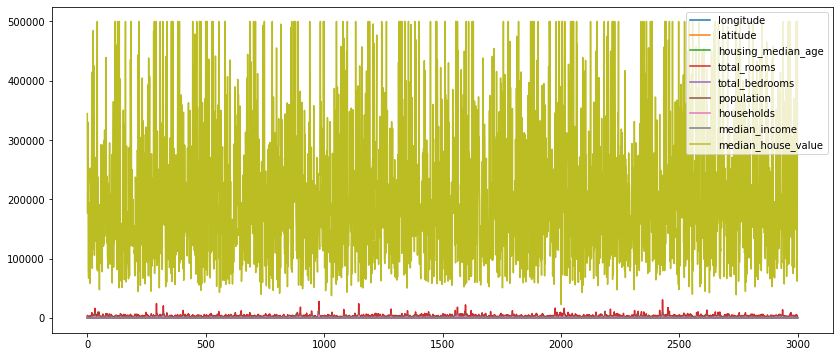

In [43]:
df.plot(figsize=(14,6))

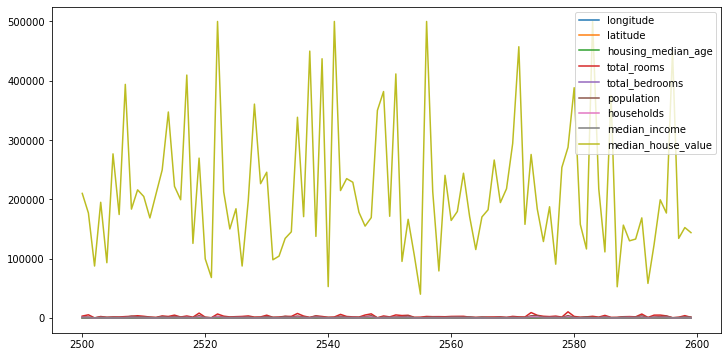

In [60]:
df.loc['250':'260'].plot(figsize=(12,6))

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [62]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [66]:
df.loc['0':'15',['median_income','median_house_value']]

,median_income,median_house_value
0,6.6085,344700.0
1,3.5990,176500.0
2,5.7934,270500.0
3,6.1359,330000.0
4,2.9375,81700.0
5,1.6635,67000.0
6,1.6641,67000.0
7,3.2250,166900.0
8,3.6696,194400.0
9,2.3333,164200.0


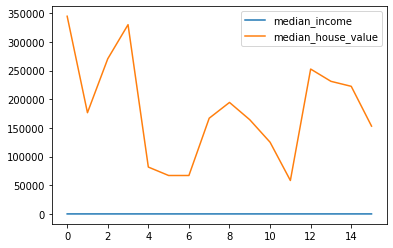

In [68]:
inc=df.loc['0':'15',['median_income','median_house_value']]
inc.plot()

In [74]:
df.mean()

longitude               -119.589200
latitude                  35.635390
housing_median_age        28.845333
total_rooms             2599.578667
total_bedrooms           529.950667
population              1402.798667
households               489.912000
median_income              3.807272
median_house_value    205846.275000
dtype: float64

In [75]:
inc.mean()

median_income              3.713531
median_house_value    181600.000000
dtype: float64

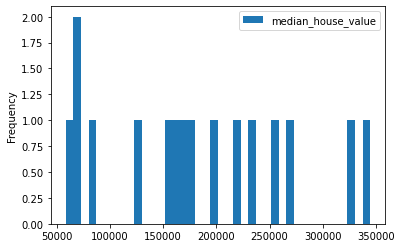

In [82]:
inc.plot(y='median_house_value', kind='hist', bins=40)

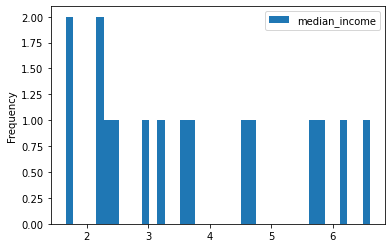

In [83]:
inc.plot(y='median_income', kind='hist', bins=40)

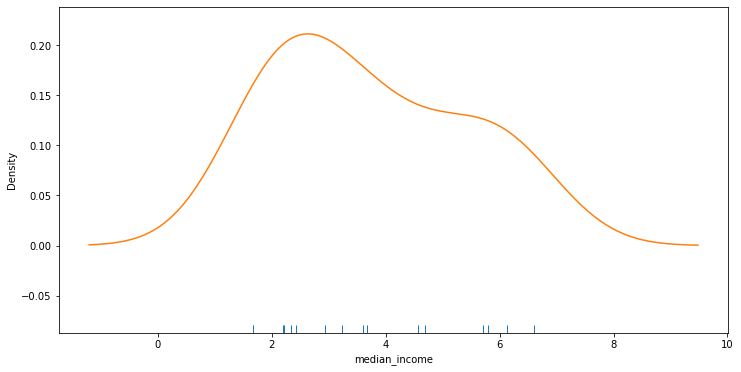

In [92]:
fig, ax= plt.subplots(figsize=(12,6))
sns.rugplot(inc['median_income'], ax=ax)
sns.kdeplot(inc['median_income'], ax=ax)

**Cumulative Plot**




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


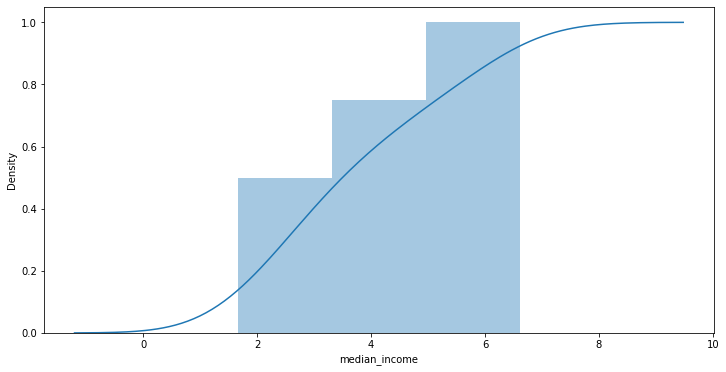

In [96]:
fig, ax=plt.subplots(figsize=(12,6))
sns.distplot(inc['median_income'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)
             )

## Visualizing bivariate distributions


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


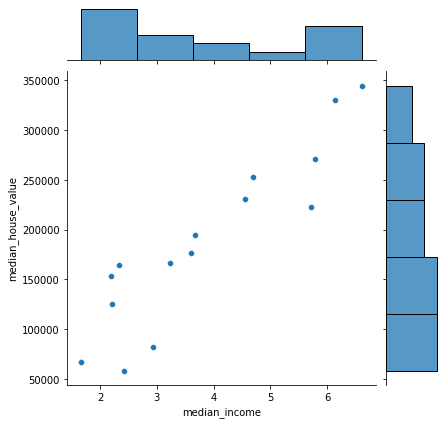

In [97]:
sns.jointplot(x='median_income',y='median_house_value',data=inc, size=6)

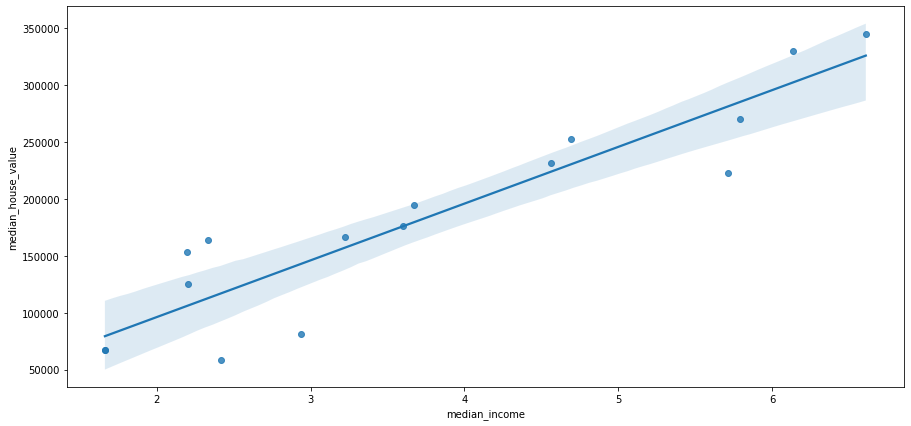

In [99]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="median_income", y="median_house_value", data=inc, ax=ax)